<a href="https://colab.research.google.com/github/Granero0011/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#We have a lot of packages to install
pip install web.py

  Using cached https://files.pythonhosted.org/packages/fc/58/21649fc1849b1f688f3d42e25e79615cc573469ea57eaa9e6af70b1e3b87/web.py-0.39.tar.gz
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-ijsjduut/web.py/


In [4]:
pip install googlefinance.get


In [6]:
pip install -i https://pypi.python.org/pypi googlefinance.get

Looking in indexes: https://pypi.python.org/pypi


In [0]:
#Let's import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import mpl_finance

In [2]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 655kB 207.8MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-irwpu1x5/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [5]:
pip install mpl_finance

In [0]:
#Let's import some more libraries
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from google.colab import files
%matplotlib inline

In [0]:
#set the style (in progress, I tried switching to fivethirtyeight but I couldn't fix the x axis[to be continued])
style.use('ggplot')

In [0]:
#Let's define our timeframe
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

In [0]:
#After discovering the code of the three majors car companies, let's retrieve the data from IEX
df = web.DataReader("TSLA", 'iex', start, end)
df2= web.DataReader("GM", 'iex', start, end)
df3 = web.DataReader("F", 'iex', start, end) 

In [42]:
#Check the data
print(df.head())

              open      high     low   close   volume
date                                                 
2018-01-02  312.00  322.1099  311.00  320.53  4352241
2018-01-03  321.00  325.2500  315.55  317.25  4521527
2018-01-04  312.87  318.5500  305.68  314.62  9946304
2018-01-05  316.62  317.2400  312.00  316.58  4591180
2018-01-08  316.00  337.0199  315.50  336.41  9859435


In [0]:
df.to_csv("TSLA.csv")
files.download('TSLA.csv')

In [0]:
df2.to_csv("GM.csv")
files.download('GM.csv')

In [0]:
df3.to_csv("F.csv")
files.download('F.csv')

In [0]:
#After downloading, let's load the csv files, and calculate the moving average
url = 'https://raw.githubusercontent.com/Granero0011/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/TSLA.csv'
df = pd.read_csv(url, parse_dates=True, index_col=0)
df['100ma'] = df['close'].rolling(window=100,min_periods=0).mean()

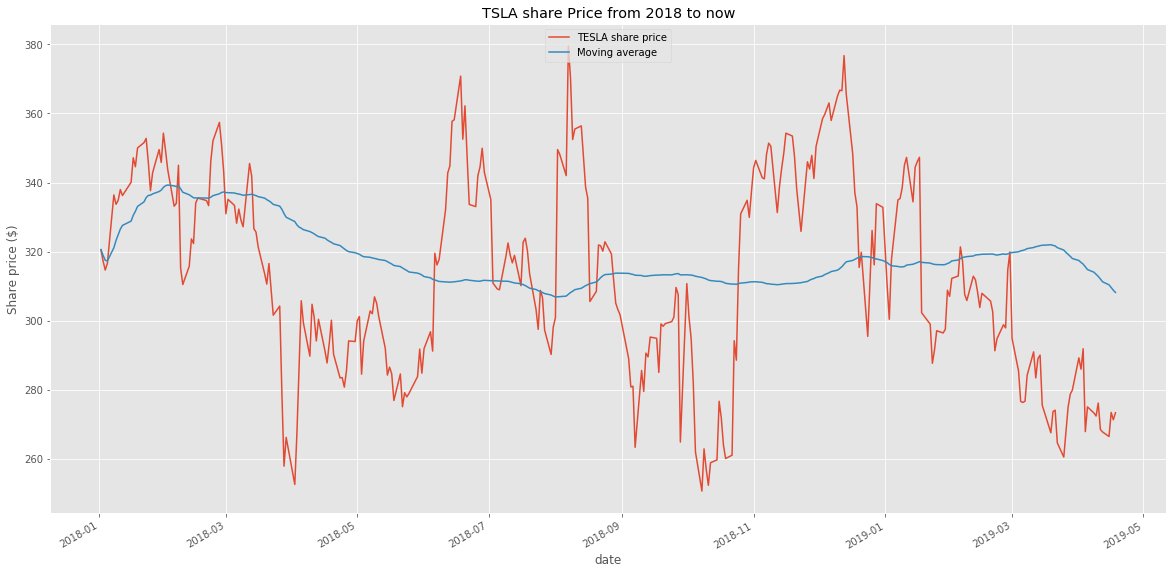

In [67]:
labels= ["TESLA share price", "Moving average"]
plt.figure(figsize=(20, 10))
df['close'].plot()
df['100ma'].plot()
plt.ylabel("Share price ($)")
plt.title("TSLA share Price from 2018 to now")
plt.legend(labels, loc='upper center')
plt.show()

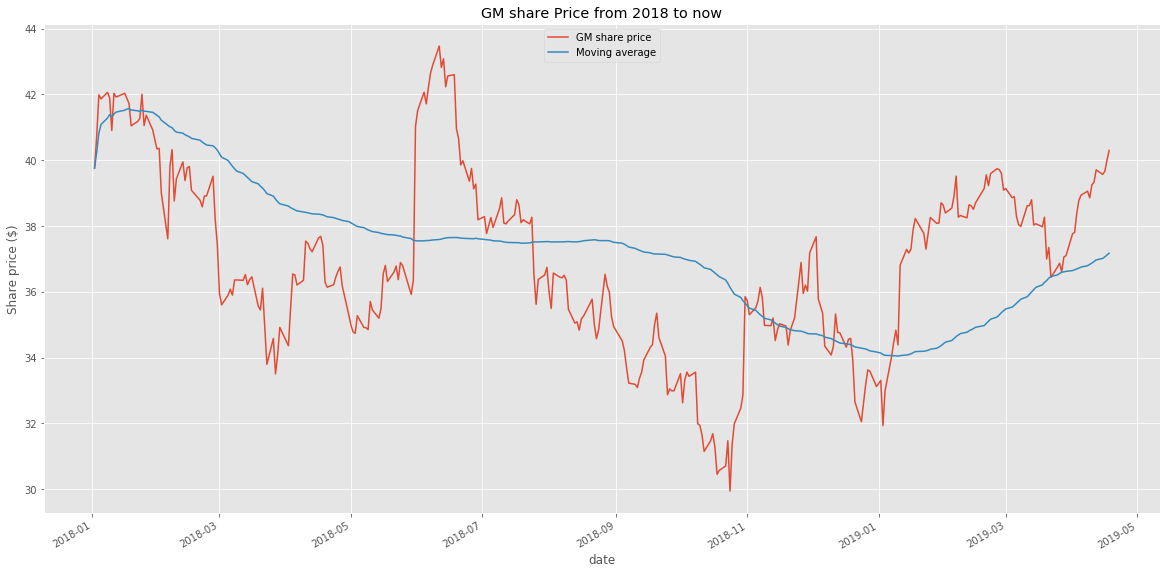

In [66]:
url = 'https://raw.githubusercontent.com/Granero0011/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/GM.csv'
df2 = pd.read_csv(url, parse_dates=True, index_col=0)
df2['100ma'] = df2['close'].rolling(window=100,min_periods=0).mean()
labels= ["GM share price", "Moving average"]
plt.figure(figsize=(20, 10))
df2['close'].plot()
df2['100ma'].plot()

plt.ylabel("Share price ($)")
plt.title("GM share Price from 2018 to now")
plt.legend(labels, loc='upper center')
plt.show()


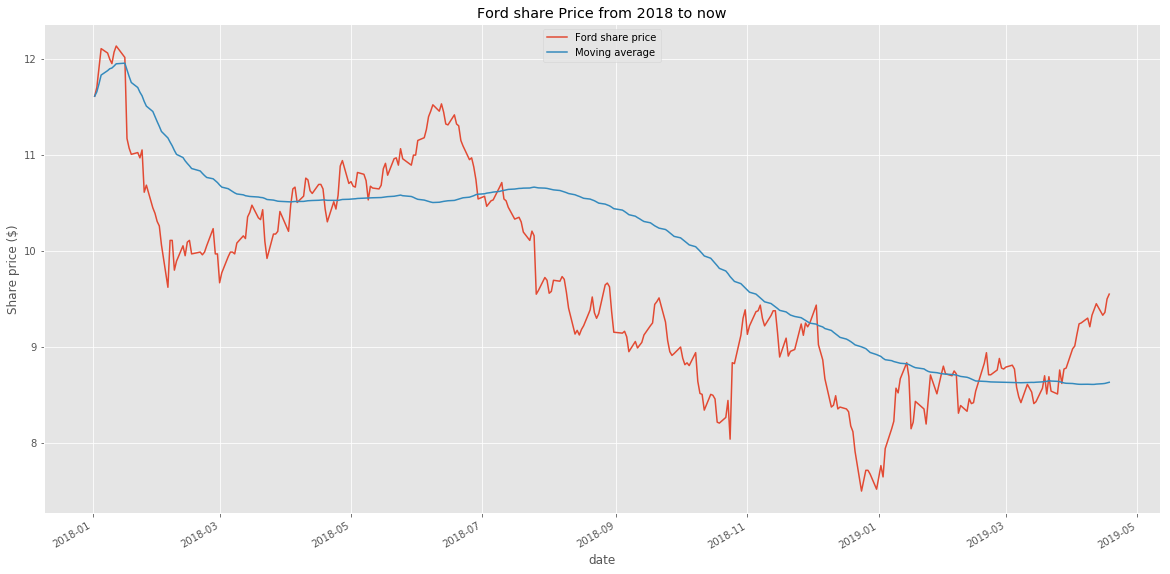

In [68]:
url = 'https://raw.githubusercontent.com/Granero0011/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/F.csv'
df3 = pd.read_csv(url, parse_dates=True, index_col=0)
df3['100ma'] = df3['close'].rolling(window=100,min_periods=0).mean()
labels= ["Ford share price", "Moving average"]
plt.figure(figsize=(20, 10))
df3['close'].plot()
df3['100ma'].plot()
plt.ylabel("Share price ($)")
plt.title("Ford share Price from 2018 to now")
plt.legend(labels, loc='upper center')
plt.show()

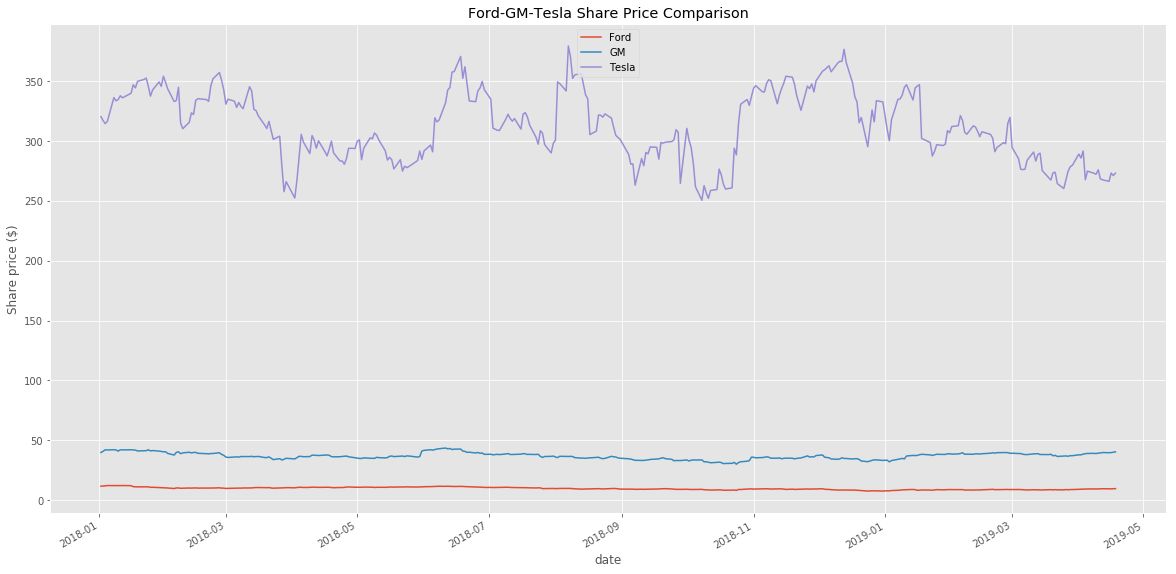

In [65]:
labels=["Ford", "GM", "Tesla"]
plt.figure(figsize=(20, 10))
df3['close'].plot()
df2['close'].plot()
df['close'].plot()
plt.ylabel("Share price ($)")
plt.title("Ford-GM-Tesla Share Price Comparison")
plt.legend(labels, loc='upper center')
plt.show()

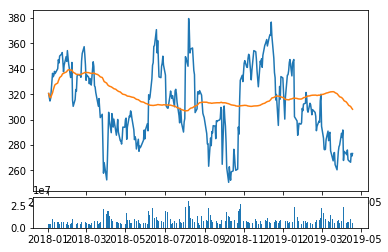

In [22]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['volume'])

plt.show()

In [0]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [0]:
df_ohlc = df['close'].resample('10D').ohlc()

In [0]:
import bs4 as bs
import pickle
import requests

In [7]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['3M Company',
 'Abbott Laboratories',
 'AbbVie Inc.',
 'ABIOMED Inc',
 'Accenture plc',
 'Activision Blizzard',
 'Adobe Systems Inc',
 'Advanced Micro Devices Inc',
 'Advance Auto Parts',
 'AES Corp',
 'Affiliated Managers Group Inc',
 'AFLAC Inc',
 'Agilent Technologies Inc',
 'Air Products & Chemicals Inc',
 'Akamai Technologies Inc',
 'Alaska Air Group Inc',
 'Albemarle Corp',
 'Alexandria Real Estate Equities',
 'Alexion Pharmaceuticals',
 'Align Technology',
 'Allegion',
 'Allergan, Plc',
 'Alliance Data Systems',
 'Alliant Energy Corp',
 'Allstate Corp',
 'Alphabet Inc Class A',
 'Alphabet Inc Class C',
 'Altria Group Inc',
 'Amazon.com Inc.',
 'Ameren Corp',
 'American Airlines Group',
 'American Electric Power',
 'American Express Co',
 'American International Group',
 'American Tower Corp.',
 'American Water Works Company Inc',
 'Ameriprise Financial',
 'AmerisourceBergen Corp',
 'AMETEK Inc.',
 'Amgen Inc.',
 'Amphenol Corp',
 'Anadarko Petroleum Corp',
 'Analog Devices, Inc